## Investigating Fandango Movie Ratings

This project is about analyzing whether Fandango -a movie rating site- is rating movies fairly.

In [1]:
import pandas as pd
# r stands for ratings
r_before = pd.read_csv("fandango_score_comparison.csv")
r_after = pd.read_csv("movie_ratings_16_17.csv")

r_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
r_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
# f stands for fandango
f_before = r_before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes",
                             "Fandango_Difference"]].copy()
f_after = r_after[["movie", "year", "fandango"]].copy()

f_before.head(20)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [4]:
(f_before["Fandango_votes"] < 30).unique()

array([False])

There is no unpopular movie (popular is taken as more than 30 votes)

In [5]:
# we only need movies from year 2015 and 2016

f_before["Year"] = f_before["FILM"].str[-5:-1]
f_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [6]:
f_2015 = f_before[f_before["Year"] == "2015"]
f_2015.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In [7]:
# checking popularity of movies in f_after by checking r_after
r_after["audience"].value_counts().sort_index()

11    1
13    1
16    2
17    1
18    1
19    1
20    1
21    2
22    6
24    1
25    1
26    1
27    2
28    2
30    4
31    3
33    1
34    2
36    1
37    3
38    5
39    3
40    1
41    3
42    2
43    3
44    2
45    7
46    1
47    4
     ..
64    5
65    2
66    3
67    3
68    2
69    5
70    4
71    3
72    2
73    3
74    5
75    2
76    3
77    3
78    2
79    6
80    1
81    6
82    4
83    3
84    3
85    4
86    2
87    4
88    4
89    3
90    2
91    1
92    3
93    3
Name: audience, Length: 75, dtype: int64

Most of the values are seem to be greater than 30. Remember 30 was our popularity threshold.

In [8]:
f_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [9]:
f_2016 = f_after[f_after["year"] == 2016]
f_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Visually

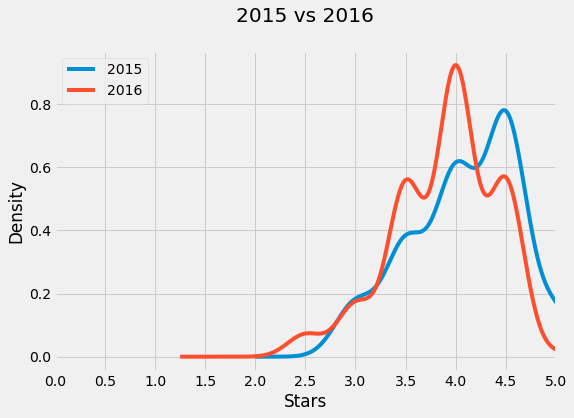

In [10]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use("fivethirtyeight")

f_2015["Fandango_Stars"].plot.kde(label = "2015", legend = True, figsize = (8,5.5))
f_2016["fandango"].plot.kde(label = "2016", legend = True)

plt.title("2015 vs 2016",
          y = 1.07)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

There is definitely a decrease in score distribution.

In [11]:
f_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
f_2016["fandango"].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Change can be better seen with these frequncies.

In [13]:
mean_2015 = f_2015["Fandango_Stars"].mean()
mean_2016 = f_2016["fandango"].mean()

median_2015 = f_2015["Fandango_Stars"].median()
median_2016 = f_2016["fandango"].median()

mode_2015 = f_2015["Fandango_Stars"].mode()[0]
mode_2016 = f_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean", "median", "mode"]
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


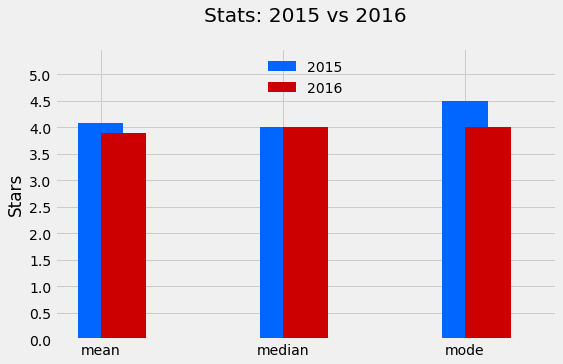

In [14]:
plt.style.use("fivethirtyeight")
summary["2015"].plot.bar(color = "#0066FF", align = "center", label = "2015", width = .25)
summary["2016"].plot.bar(color = "#CC0000", align = "edge", label = "2016", width = .25,
                         rot = 0, figsize = (8,5))

plt.title("Stats: 2015 vs 2016", y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel("Stars")
plt.legend(framealpha = 0, loc = "upper center")
plt.show()

There is a drop in mean by (4-3.8) / 4 = 5%